<a href="https://colab.research.google.com/github/ddv246/DSBA-Project/blob/master/Copy_of_LendingClub_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1gE0Cn3loveMB7eDAlHbGBrPzcagvtIMn)

#**LENDING CLUB LOAN DEFAULT ANALYSIS**

---

## **Project Overview**

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. LendingClub enables borrowers to create unsecured personal loans between 1,000 and 40,000 dollars. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.


Within this project, We will intend to build a machine learning algorithm for the purpose of correctly identifying whether a person, given certain characteristics, has a high likelihood to default on a loan. There is a certain methodology that needs to be followed in order to properly load effective predictors - data cleaning, exploration, and feature engineering.


# **Dataset**


---

The dataset is taken from Kaggle. The data files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. 

# **Content**

---


1.   Project Overview
2.   Dataset
3.   Loading the Data
4.   Understanding the Data
5.   Data Cleaning
6.   Exploratory Data Analysis and Data pre-processing









In [279]:
#If opening in colab run this cell
!git clone https://github.com/ddv246/Lending-Club
%cd Lending-Club

Cloning into 'Lending-Club'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
/content/Lending-Club/Lending-Club/Lending-Club/Lending-Club/Lending-Club/Lending-Club/Lending-Club


### **Import Libraries:**

---



---



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

## **Loading the Data**

---



---



In [0]:
start_df = pd.read_csv('Loansample.csv', low_memory=False)

In [282]:
df = start_df.copy(deep=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,167.02,...,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,1507.11,...,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,353.89,...,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0,Feb-2006,0,NaN,NaN,10,0,5468,78.1,13,w,3831.93,3831.93,286.71,286.71,...,0,0,385183,36151,5000,44984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0,Dec-2000,0,NaN,NaN,12,0,829,3.6,26,w,29339.02,29339.02,1423.21,1423.21,...,0,0,157548,29674,9300,32332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking Dimensions


In [283]:
df.shape

(99999, 145)

#### Understanding columns in the Dataframe

In [284]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

## **Understanding the Data**

---
Description of various columns in the dataset


In [285]:
df_description = pd.read_excel('LCDataDictionary (1).xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


## **Data Cleaning**

---



---



#### **1. Parsing loan_status**

In [286]:
df['loan_status'].value_counts()

Current               96792
Fully Paid             2431
Late (31-120 days)      318
In Grace Period         316
Late (16-30 days)       123
Charged Off              19
Name: loan_status, dtype: int64

In [287]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,167.02,...,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,1507.11,...,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,353.89,...,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0,Feb-2006,0,NaN,NaN,10,0,5468,78.1,13,w,3831.93,3831.93,286.71,286.71,...,0,0,385183,36151,5000,44984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0,Dec-2000,0,NaN,NaN,12,0,829,3.6,26,w,29339.02,29339.02,1423.21,1423.21,...,0,0,157548,29674,9300,32332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


#### **2.Removing the columns having more than 90% missing values**

In [288]:
# summarising number of missing values in each column
df.isnull().sum().sort_values().tail(50)

num_tl_120dpd_2m                               2486
mo_sin_old_il_acct                             3448
mths_since_rcnt_il                             3448
emp_length                                     9226
mths_since_recent_inq                         12233
il_util                                       15652
emp_title                                     16527
mths_since_last_delinq                        56068
mths_since_recent_revol_delinq                71167
mths_since_last_major_derog                   77123
mths_since_recent_bc_dlq                      80194
sec_app_collections_12_mths_ex_med            87078
sec_app_chargeoff_within_12_mths              87078
sec_app_num_rev_accts                         87078
sec_app_open_act_il                           87078
sec_app_mort_acc                              87078
sec_app_inq_last_6mths                        87078
sec_app_open_acc                              87078
revol_bal_joint                               87078
sec_app_earl

In [289]:
# percentage of missing values in each column
perc=round(df.isnull().sum()/len(df.index), 2)*100
perc=perc.sort_values().tail(40)
perc

mths_since_recent_bc_dlq                       80.0
sec_app_collections_12_mths_ex_med             87.0
sec_app_chargeoff_within_12_mths               87.0
sec_app_num_rev_accts                          87.0
sec_app_open_act_il                            87.0
sec_app_revol_util                             87.0
sec_app_mort_acc                               87.0
sec_app_inq_last_6mths                         87.0
sec_app_open_acc                               87.0
revol_bal_joint                                87.0
annual_inc_joint                               87.0
dti_joint                                      87.0
sec_app_earliest_cr_line                       87.0
mths_since_last_record                         88.0
verification_status_joint                      89.0
sec_app_mths_since_last_major_derog            96.0
hardship_loan_status                          100.0
orig_projected_additional_accrued_interest    100.0
hardship_payoff_balance_amount                100.0
hardship_las

We see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

In [290]:
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]
print(missing_columns)

Index(['id', 'member_id', 'url', 'desc', 'sec_app_mths_since_last_major_derog',
       'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object')


In [291]:
df = df.drop(missing_columns, axis=1)
print(df.shape)

(99999, 120)


Summarise number of missing values again

In [292]:
100*(df.isnull().sum()/len(df.index)).tail(20)

percent_bc_gt_75                       1.310013
pub_rec_bankruptcies                   0.000000
tax_liens                              0.000000
tot_hi_cred_lim                        0.000000
total_bal_ex_mort                      0.000000
total_bc_limit                         0.000000
total_il_high_credit_limit             0.000000
revol_bal_joint                       87.078871
sec_app_earliest_cr_line              87.078871
sec_app_inq_last_6mths                87.078871
sec_app_mort_acc                      87.078871
sec_app_open_acc                      87.078871
sec_app_revol_util                    87.281873
sec_app_open_act_il                   87.078871
sec_app_num_rev_accts                 87.078871
sec_app_chargeoff_within_12_mths      87.078871
sec_app_collections_12_mths_ex_med    87.078871
hardship_flag                          0.000000
disbursement_method                    0.000000
debt_settlement_flag                   0.000000
dtype: float64

We see that there are still many columns with 87 percent of missing values. Removing columns with more than 70 % of null values as well.

In [293]:
missing_columns1 = df.columns[100*(df.isnull().sum()/len(df.index)) > 70]
print(missing_columns1)

Index(['mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
       'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med'],
      dtype='object')


In [294]:
df = df.drop(missing_columns1, axis=1)
print(df.shape)

(99999, 103)


In [295]:
sum=100*(df.isnull().sum()/len(df.index))
sum.sort_values().tail(40)

int_rate                    0.000000
term                        0.000000
funded_amnt_inv             0.000000
funded_amnt                 0.000000
verification_status         0.000000
pub_rec                     0.000000
inq_last_6mths              0.000000
total_rec_prncp             0.000000
last_pymnt_amnt             0.000000
collection_recovery_fee     0.000000
recoveries                  0.000000
total_rec_late_fee          0.000000
total_rec_int               0.000000
revol_bal                   0.000000
total_pymnt_inv             0.000000
total_pymnt                 0.000000
out_prncp_inv               0.000000
out_prncp                   0.000000
debt_settlement_flag        0.000000
total_acc                   0.000000
initial_list_status         0.000000
last_credit_pull_d          0.001000
avg_cur_bal                 0.009000
all_util                    0.030000
revol_util                  0.121001
last_pymnt_d                0.127001
dti                         0.182002
m

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 103 entries, loan_amnt to debt_settlement_flag
dtypes: float64(28), int64(52), object(23)
memory usage: 78.6+ MB


## **Exploratory Data Analysis and Data Pre-processing**

---

Exploratory Data Analysis, or EDA, is an integral part of understanding the LendingClub dataset. Before moving towards classification, it's vital to become familiar with different relationships within the data. Analyzing these relationships will provide intuition about how to interpret the results of the proceeding models. Asking questions about these relationships beforehand might also supply additional knowledge about relationships that we might have not known existed. This section will further investigate the distribution of data and ask specific questions about the information lying inside the dataset.


We'll inspect each feature individually, and do the following:

1.Drop the feature if it is not useful for predicting the loan status.

2.View summary statistics and visualize the data, plotting against the loan status.

3.Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the loan status:

In [0]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [298]:
print(list(df.columns))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_

## **1.Delinquincy**
#### Loan Status 
#### Data Dictionary: Current status of the loan

##### Delinquency happens when a borrower fails to pay the minimum amount for an outstanding debt.

According to the definitions used by Lending Club.

*   **Charged Off** — defaulted loans for which there is no expectation from the lender in recovering the debt
*   **Default** — borrower has failed to pay his obligations for more than 120 days
*   **Late** — borrower has failed to pay his obligations for 31 to 120 days
*   **Grace Period** — borrower still has time to pay his obligations without being considered delinquent
*   **Late** — payment is late by 16 to 30 days

In [299]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Current               96792
Fully Paid             2431
Late (31-120 days)      318
In Grace Period         316
Late (16-30 days)       123
Charged Off              19
Name: loan_status, dtype: int64

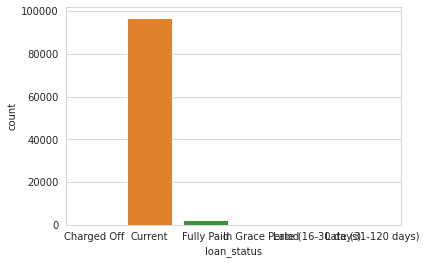

In [300]:
sns.countplot(df['loan_status'],)

**Description:** We can see that most of the data are of "current" loan status.

Below is the statistics of Loan Status.
Converting Loan status to 0 if fully paid and 1 if otherwise

In [301]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    2431
1     776
Name: loan_status, dtype: int64

Lets first look at overall default rate

In [302]:
round(np.mean(df['loan_status']), 2)

0.24

Determining the percentage of loan that is fully paid/ charged off

In [304]:
df['loan_status'].value_counts(normalize=True, dropna=False)

0    0.758029
1    0.241971
Name: loan_status, dtype: float64

**Description:** About 75% of the remaining loans have been fully paid and 24% have charged off, so we have a somewhat unbalanced classification problem.

## **2.Loan Amount**

#### Data Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [305]:
df['loan_amnt'].describe()

count     3207.000000
mean     14589.179919
std      10242.113589
min       1000.000000
25%       6000.000000
50%      12000.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

**Description:** Loan amount ranges from 40000 to 1000 with a mean of 15934

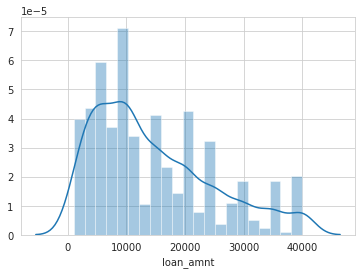

In [306]:
sns.distplot(df['loan_amnt'])

**Description:** Comparing the summary statistics of loan status

In [307]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2431.0,14110.777458,10220.675812,1000.0,6000.0,11000.0,20000.0,40000.0
1,776.0,16087.886598,10170.780722,1000.0,8000.0,14200.0,24000.0,40000.0


### **Analysing how the default rate varies across continuous variables.**

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [0]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [309]:
df['loan_amnt'].value_counts()

medium       1292
high          785
very high     605
low           525
Name: loan_amnt, dtype: int64

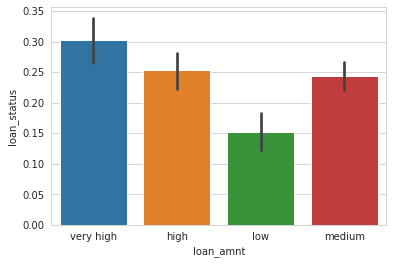

In [310]:
plot_cat('loan_amnt')

## **3.Interest Rate**

#### Data Dictionary: "Interest Rate on the loan."

In [311]:
df['int_rate'].describe()

count    3207.000000
mean       14.589136
std         5.536465
min         6.110000
25%        10.470000
50%        13.560000
75%        17.970000
max        30.940000
Name: int_rate, dtype: float64

**Description:** From the description, Interest rate ranges from a maximum of 30.99% to a minimum of 6%.

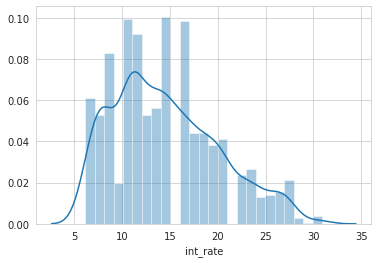

In [312]:
sns.distplot(df['int_rate'])

Comparing the summary statistics of Interest Rate

In [313]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,2431.0,14.038013,5.452463,6.11,10.33,12.98,17.97,30.94
1,776.0,16.315657,5.445079,6.11,11.80,16.14,19.92,30.94


Lets also convert interest rate to low, medium, high

In [0]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

#### **Comparing default rates across interest rates**

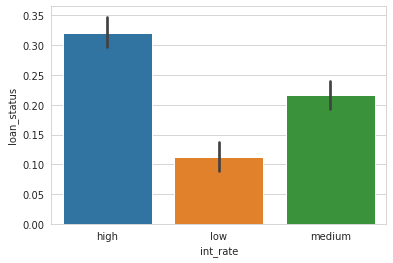

In [315]:
plot_cat('int_rate')

## **4.Grade and Subgrade**

Loan Grades and Subgrades are assigned by Lending Club based on the borrower’s credit worthiness and also on some variables specific to that Loan.



In [0]:
grade_vis = df['grade'].value_counts()

Plotting the values

Text(0.5, 0, 'Count')

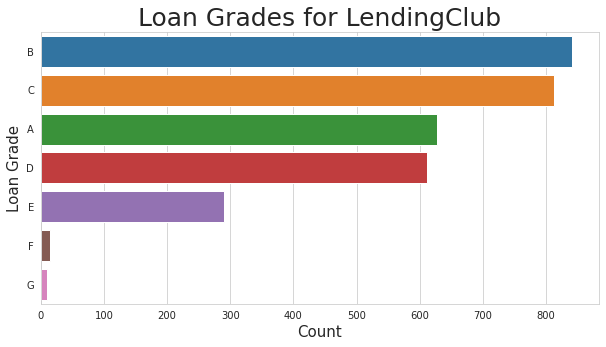

In [317]:
plt.figure(figsize=(10,5))
sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

We see that majority of the loans are either in grade B or grade C, which together corresponds to about 50% of the loan population.

While there are a considerable amount of loans in Grade D and in Grade A, there is quite a small amount in Grade G which corresponds to uncollectible loans. 

This gives a good sign that Lending Club has less of uncollectible loans.


Looking more closely into Grade and Sub_Grade,

In [318]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [319]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G4']


**Description:** from the above, we see that the grade is implied by subgrade.

#### **Comparing default rates across sub grade**

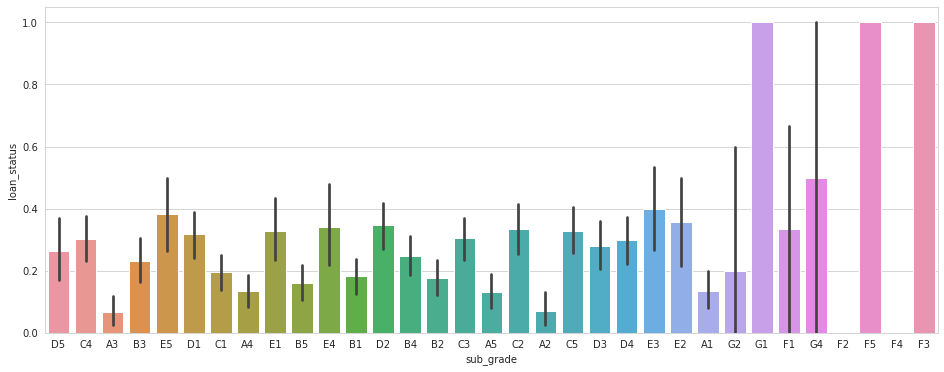

In [320]:
# sub-grade: 
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

**Description:** A1 is better than A2 better than A3 and so on

#### Multivariate Segmentation - Loan Status by Grade

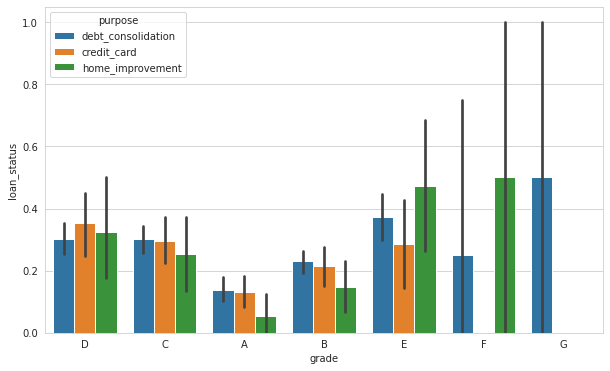

In [367]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('grade')

Zooming in Delinquint loans and analysing the grade and sub-grade, we see that majority of the charged off loans were of Grade B. (~535K%) 

Listing by Majority of Charged off Loan's grades,


1.   Grade B
2.   Grade A
3.   Grade C



#### Compaing installment values with Loan Grade

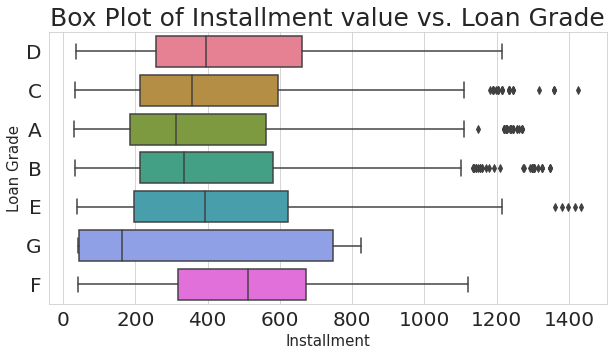

In [321]:
plt.figure(figsize=(10,5))
sns.boxplot(x="installment", y="grade", data=df, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### Visualizing average default rate across categories.

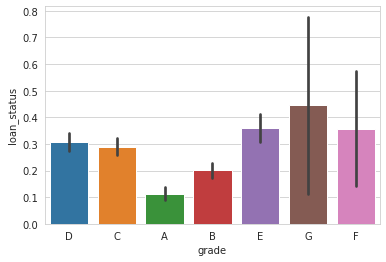

In [303]:
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

## **5.Purpose**

Why are people requesting Loan? What were the most frequent loan purpose


We will segment the loan applications across the purpose of the loan. Purpose of the Loan seems to be affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

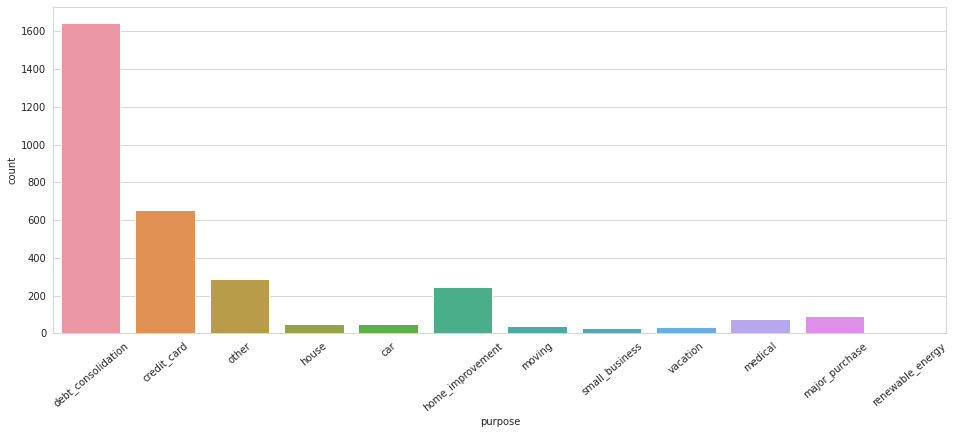

In [322]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=df)
plt.show()

From the above graph we can see that debt consolidation is a clear winner for loan purpose with more than 1600k loans, followed by credit card loans and so on

Top 3 Loan Purpose 

*   Debt Consolidation
*   Credit Card Loans
*   Home Improvement


Let's analyse the top 3 types of loans based on purpose:

In [323]:
main_purposes = ["credit_card","debt_consolidation","home_improvement"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    1646
credit_card            655
home_improvement       244
Name: purpose, dtype: int64

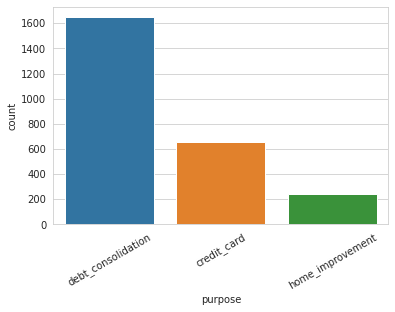

In [324]:
sns.countplot(x=df['purpose'])
plt.xticks(rotation=30)
plt.show()

#### **Comparing default rates with purpose**

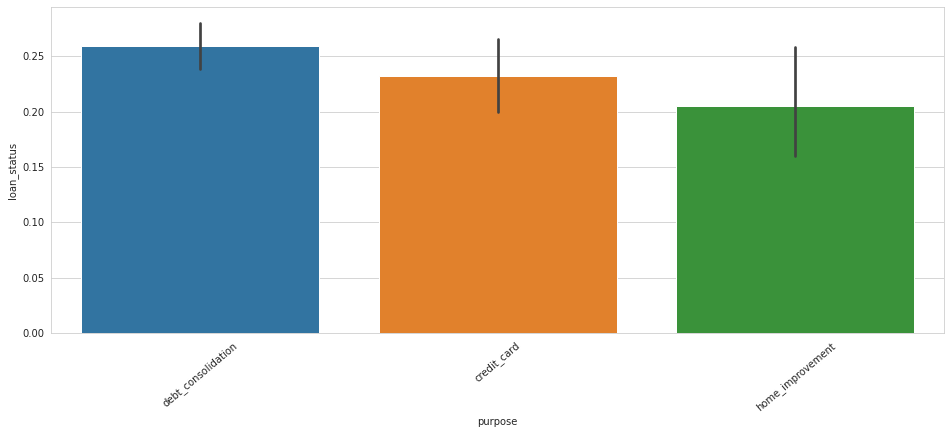

In [325]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40) 
plot_cat('purpose')

## **6.Installment**

In [326]:
df['installment'].describe()

count    2545.000000
mean      461.266299
std       289.173755
min        30.890000
25%       245.050000
50%       380.540000
75%       625.260000
max      1433.960000
Name: installment, dtype: float64

Installment amount ranges from a maximum of 1618 to minimum of 30.64. 

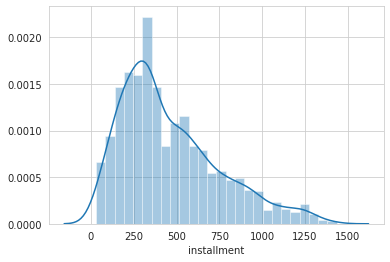

In [327]:
sns.distplot(df['installment'])

In [328]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1916.0,447.177082,284.175754,30.89,235.13,369.51,609.82,1358.58
1,629.0,504.183529,300.070691,35.23,278.19,415.18,679.29,1433.96


#### **Comparing Default rates across Installments** 

In [0]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

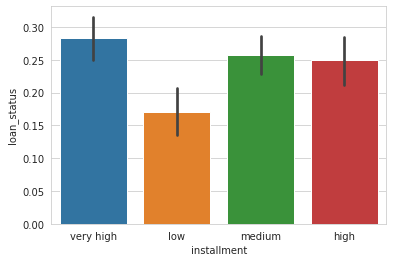

In [330]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()
    
plot_cat('installment')

## **Verification Status**

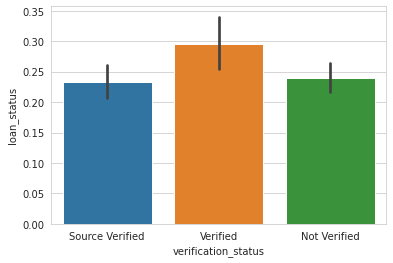

In [331]:
# verification_status: 
plot_cat('verification_status')

**Description:**Surprisingly, verified loans default more than not verified

### **Distribution of loans across Years**

In [332]:
df['issue_d'].head()

100    Dec-2018
152    Dec-2018
170    Dec-2018
186    Dec-2018
215    Dec-2018
Name: issue_d, dtype: object

In [334]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

AttributeError: ignored

In [0]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

In [0]:
# number of loans across months
df.groupby('month').month.count()